In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
respondentData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusresp_2015.csv")
rosterData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusrost_2015.csv")
whoData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atuswho_2015.csv")
activityData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusact_2015.csv")
elderCareData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusrostec_2015.csv")
cpsData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atuscps_2015.csv")

In [4]:
activityDataLabels = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/activityDataLabels.csv")

In [29]:
activityDecoder = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/ActivityCodes.csv",quotechar='"')
incomeDecoder = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/IncomeCodes.csv",quotechar='"')
#print activityDecoder
activityDecoderGrouped = activityDecoder.groupby(['TUTIER1CODE'])
print len(activityDecoderGrouped)
#print activityDecoderGrouped[activityDecoderGrouped['major code']==1]
print len(activityDecoder[activityDecoder['TUTIER1CODE']==1])
print activityDecoder[activityDecoder['TUTIER1CODE']==1]
#for codeName,decoder in activityDecoderGrouped:
#    print "****** "+str(codeName)
#    print decoder['second label']


18
6
   TUTIER1CODE    tier1 label  TUTIER2CODE                tier2 label
0            1  Personal Care            1                   Sleeping
1            1  Personal Care            2         Grooming, dressing
2            1  Personal Care            3    Health-related selfcare
3            1  Personal Care            4        Personal Activities
4            1  Personal Care            5  Personal Care Emergencies
5            1  Personal Care           99       Personal Care n.e.c.


In [9]:
#feed in times from activityData data frame
#output minutes lapsed
def duration(stopTime,startTim):
    t2 = pd.Timedelta(stopTime)
    t1 = pd.Timedelta(startTim)
    dur = t2 - t1
    if dur < pd.Timedelta('0 days'):
        dur = dur + pd.Timedelta('1 days')
    return dur/pd.Timedelta(minutes=1)

def durationSeries(row):
    t2 = pd.Timedelta(row['TUSTOPTIME'])
    t1 = pd.Timedelta(row['TUSTARTTIM'])
    dur = t2 - t1
    if dur < pd.Timedelta('0 days'):
        dur = dur + pd.Timedelta('1 days')
    return dur/pd.Timedelta(minutes=1)
    

In [10]:
activityDataAbrrv = activityData[['TUCASEID','TUACTIVITY_N','TUACTDUR','TUSTARTTIM','TUSTOPTIME','TUTIER1CODE','TUTIER2CODE','TUTIER3CODE']]

In [11]:
activityDataByRespondent = activityDataAbrrv.groupby('TUCASEID')

found respondant!
shape TtimeSpent[0]:(18,)
shape TtimeSpent[1]:(18,)
['600' '316' '0' '0' '0' '0' '0' '0' '0' '0' '50' '474' '0' '0' '0' '0' '0'
 '0']
[600, 316, 0, 0, 0, 0, 0, 0, 0, 0, 50, 474, 0, 0, 0, 0, 0, 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 18 columns):
Personal Care                              1 non-null int64
Household Activites                        1 non-null int64
Caring For & Helping HH Members            1 non-null int64
Caring For & Helping non-HH Members        1 non-null int64
Work & Work-Related Activities             1 non-null int64
Education                                  1 non-null int64
Consumer Purchases                         1 non-null int64
Professional & Personal Care Services      1 non-null int64
Household Services                         1 non-null int64
Government Services & Civic Obligations    1 non-null int64
Eating and Drinking                        1 non-null int64
Socializing, Relaxing, an

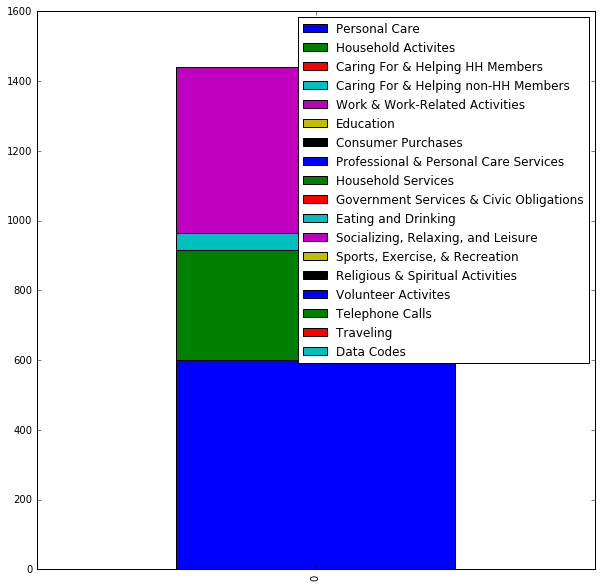

In [133]:

for respondentName,respAct in activityDataByRespondent:
    if 20150101150018==respondentName:
        print "found respondant!"
        timeSpent=[]
        timeResp = 0
        #num = respAct[respAct['TUTIER1CODE']==1]
        #num2 = num['TUACTDUR'].sum()
        #print num2
        #print activityDecoder['major label']
        #DF2 = pd.merge(activityDecoder,respAct, left_on='major label', right_on='TUTIER1CODE')
        #print activityDecoder[['major label','major code']]
        DF2 = respAct.merge(activityDecoder, on=['TUTIER1CODE','TUTIER2CODE'])
        #print DF2
        
        for ActName1,actGroup1 in activityDecoderGrouped:
            #lablOfG1 = actGroup1['tier1 label',1]
            #print lablOfG1
            
            actsOfG1 = DF2[DF2['TUTIER1CODE']==ActName1]
            #print actsOfG1
            #print type(actsOfG1)
            timeOfG1 = actsOfG1['TUACTDUR'].sum()
            lablOfG1 = actGroup1['tier1 label'].iloc[0]
            #print lablOfG1
            #print timeOfG1
            
            eachAct = [lablOfG1,np.int(timeOfG1)]
            timeSpent.append(eachAct)
        
        #print timeSpent
        #print "***"
        TtimeSpent = np.array(timeSpent).T
        #print TtimeSpent
        print "shape TtimeSpent[0]:" + str(TtimeSpent[0].shape)
        print "shape TtimeSpent[1]:" + str(TtimeSpent[1].shape)
        #print "shape TtimeSpent[1]
        #plt.pie(TtimeSpent[1],labels=TtimeSpent[0])
        print TtimeSpent[1]
        temp= [int(i) for i in TtimeSpent[1]]
        print temp
        timeSpentDF = pd.DataFrame.from_records([temp],columns=TtimeSpent[0])
        
        #timeSpentDF = pd.DataFrame(timeSpent)
        
        print timeSpentDF.info()
        
        #timeSpentDF['G1Name']=activityDecoder[activityDecoder['major code']==1]
        
        
        
        timeSpentDF.plot(kind='bar',stacked=True,figsize=(10,10))
        
    
        #plt.bar(,timeSpentDF['time'])
        #test5 = timeSpentDF.groupby(['Site Name', 'Abuse/NFF'])['Site Name'].count().unstack('Abuse/NFF').fillna(0)

            #test5.plot(kind='bar', stacked=True)
        
            
            
    